Because of the fact that the absolute value function is not derivable at some point so that to turn the absolute value function in a derivable one we use sigmoid function.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#each point is length, width, type(0, 1)

data = [[3, 1.5,  1],
        [2, 1,    0],
        [4, 1.5,  1],
        [3, 1,    0],
        [3.5, .5, 1],
        [2,  .5,  0],
        [5.5, 1,  1],
        [1,  1,   0]]

mystery = [4.5, 1]

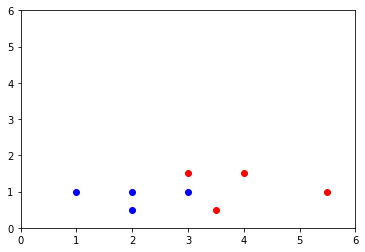

In [29]:
#scatter data
plt.axis([0, 6, 0, 6])

for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c=color)

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_deri(x):
    return sigmoid(x) * (1 - sigmoid(x))

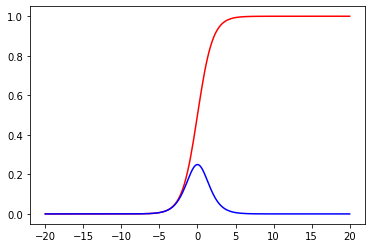

In [16]:
T = np.linspace(-20, 20, 200)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_deri(T), c='b')

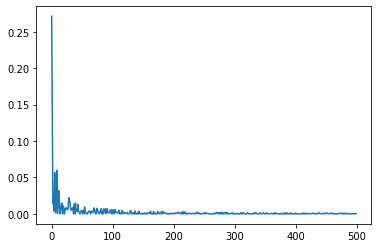

In [31]:
#training loop

learning_rate = 0.2
costs = []    # keep track of the cost

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    z = point[0] * w1 + point[1] * w2 +b
    pred = sigmoid(z)
    
    
    target = point[2]
    cost = np.square(pred - target)
    
   
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_deri(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
        
    w1 = w1 - learning_rate * dcost_dw1    
    w2 = w2 - learning_rate * dcost_dw2 
    b = b - learning_rate * dcost_db 
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 +b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
            
        costs.append(cost_sum/len(data))
        
    
plt.plot(costs)

In [32]:
#visualise model predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 +b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[2, 1, 0]
pred: 0.012447910007009684
[4, 1.5, 1]
pred: 0.983909294171236
[3.5, 0.5, 1]
pred: 0.9778325724952325
[2, 0.5, 0]
pred: 0.033965045015978
[5.5, 1, 1]
pred: 0.9999953268983607
[1, 1, 0]
pred: 0.0001083468120401737


In [33]:
z = mystery[0] * w1 + mystery[1] * w2 +b
pred = sigmoid(z)
pred

0.9994566940380918